# Twitter Analysis

This document is used to analyze on related tweet sentiment on #AirMiles related tags. 

Used Rest API, max: 100 tweets each time.

In [1]:
#!pip install tweepy

In [2]:
import tweepy
import json
import numpy as np
import pandas as pd

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find

#Progress bar
from tqdm import tqdm

from collections import Counter

#Operation
import operator

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
import sklearn.metrics as metrics

import networkx as nx
from collections import Counter
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)

C:\Users\Claire\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
ACCESS_TOKEN =   
ACCESS_SECRET =   
CONSUMER_KEY =    
CONSUMER_SECRET = 

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

### 1. Obtain related text messages 

Analyze text info for #airmiles or #Loyaltypoints; @airmiles

### REST API
###### Loyaltypoints

In [4]:
rest_api = tweepy.API(auth)

raw_results1=rest_api.search(q="#loyaltyprograms",lang='en',count=1500)

In [5]:
#raw_results1[0]._json

In [6]:
#raw_results1[1].user.location[-6:] == 'Canada'

In [7]:
def dataFrameTransformation(raw_results):
    results_REST = pd.DataFrame()
    results_REST['user'] = [tweet.user.screen_name for tweet in raw_results]
    results_REST['followers'] = [tweet.user.followers_count for tweet in raw_results]
    results_REST['location'] = [tweets.user.location for tweets in raw_results]
    results_REST['text'] = [tweet.text for tweet in raw_results]
    results_REST['hashtags'] = [tweet.entities['hashtags'] for tweet in raw_results]
    results_REST['retweets'] = [tweet.retweet_count for tweet in raw_results]
    results_REST['favorites'] = [tweet.favorite_count for tweet in raw_results]
    results_REST['language'] = [tweets.lang for tweets in raw_results]
    return results_REST

In [8]:
Loyaltyresults = dataFrameTransformation(raw_results1)
Loyaltyresults

,user,followers,location,text,hashtags,retweets,favorites,language
0,AlbensiDental,1186,"Irwin, PA",One simple way to build patient loyalty: https...,"[{'text': 'dentaloffice', 'indices': [66, 79]}...",0,0,en
1,SynergyWorld,644,San Diego,It is a mistake to think that your only valuab...,[],0,0,en
2,norvision,1968,"Tempe, AZ",Maximizing the QSR 'transformers': Online orde...,[],0,0,en
3,miles2gopodcast,82,,Looking for ways to get the #bestprice on a #h...,"[{'text': 'bestprice', 'indices': [28, 38]}, {...",0,0,en
4,culturenxt,951,"St Louis, MO",RT @MaritzLoyalty: Beating Vacation Brain: Usi...,"[{'text': 'PTO', 'indices': [49, 53]}, {'text'...",1,0,en
5,MaritzLoyalty,1063,"St Louis, MO",Beating Vacation Brain: Using #PTO Energy to R...,"[{'text': 'PTO', 'indices': [30, 34]}, {'text'...",1,1,en
6,bay34thstreet,4,,Join our Loyalty Program to avail special offe...,"[{'text': 'FreeKwent', 'indices': [93, 103]}]",0,0,en
7,Pini_Yakuel,618,"New York, NY","""#Loyalty programs are simply a way of “buying...","[{'text': 'Loyalty', 'indices': [1, 9]}]",0,0,en
8,thestartupmag,13084,,Tips for Business Succ https://t.co/7znXhXr0CQ...,"[{'text': 'advertising', 'indices': [47, 59]},...",0,0,en
9,Impact21Group,160,"Lexington, KY",We are currently witnessing a revolution in cu...,"[{'text': 'Cstore', 'indices': [99, 106]}, {'t...",0,0,en


#### Plot by area

In [9]:
# To plot some results import pyplot from matplotlib package
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
tweets_by_location = Loyaltyresults["location"].value_counts()

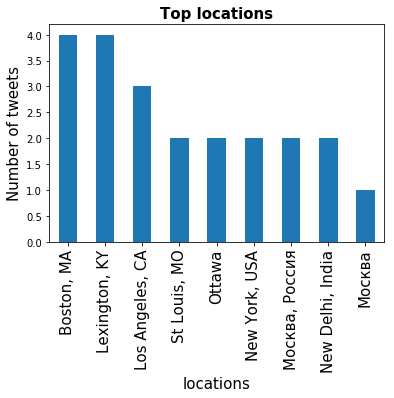

In [11]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('locations', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top locations', fontsize=15, fontweight='bold')
tweets_by_location[1:10].plot(ax=ax, kind='bar')

In [12]:
CanadaLoyalty = Loyaltyresults[Loyaltyresults['location'].str.contains("Global|Quebec|Ontario|Canada")].reset_index(drop=True)
CanadaLoyalty
# too few results 

,user,followers,location,text,hashtags,retweets,favorites,language
0,ICXAssociation,5379,Global,Is Amazon Prime Day becoming the new 'Black Fr...,[],0,0,en
1,JenFrYrEyesOnly,1738,BlackberryCityOntarioCanada,RT @boomottawa: Did you know that some people'...,[],2,0,en
2,Sue_HBS,553,"Ottawa, Ontario, Canada",RT @boomottawa: Did you know that some people'...,[],2,0,en


###### Sentiment Analysis

In [13]:
reviews1 = Loyaltyresults['text'].as_matrix()
reviews = reviews1.astype('str')

In [14]:
# Use vader to evaluated sentiment of reviews
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pd.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [15]:
reviewDF1 = evalSentences(reviews, to_df=True, columns=['tweet','vader'])
reviewDF1

100%|██████████| 96/96 [00:00<00:00, 3994.02it/s]


,tweet,vader
0,One simple way to build patient loyalty: https...,0.5423
1,It is a mistake to think that your only valuab...,0.1779
2,Maximizing the QSR 'transformers': Online orde...,0.5423
3,Looking for ways to get the #bestprice on a #h...,0.7506
4,RT @MaritzLoyalty: Beating Vacation Brain: Usi...,-0.2263
5,Beating Vacation Brain: Using #PTO Energy to R...,-0.2263
6,Join our Loyalty Program to avail special offe...,0.8395
7,"""#Loyalty programs are simply a way of “buying...",0.7184
8,Tips for Business Succ https://t.co/7znXhXr0CQ...,0.0000
9,We are currently witnessing a revolution in cu...,0.5423


In [16]:
Loyaltyresult_all = pd.concat([Loyaltyresults[['user','followers','retweets']], reviewDF1], axis=1)
Loyaltyresult_all.head()

,user,followers,retweets,tweet,vader
0,AlbensiDental,1186,0,One simple way to build patient loyalty: https...,0.5423
1,SynergyWorld,644,0,It is a mistake to think that your only valuab...,0.1779
2,norvision,1968,0,Maximizing the QSR 'transformers': Online orde...,0.5423
3,miles2gopodcast,82,0,Looking for ways to get the #bestprice on a #h...,0.7506
4,culturenxt,951,1,RT @MaritzLoyalty: Beating Vacation Brain: Usi...,-0.2263


In [17]:
reviewDF1['vader'].mean()

0.5054302083333331

In [18]:
# tweet with most positive comments
reviewDF1['tweet'][reviewDF1['vader'].idxmax()]

'Loyalty &amp; the Rise of Gen Z – a great reminder via @mcmerchant that reaching customers on mobile has become crucial… https://t.co/jrobeWSPcm'

In [19]:
# tweet with most negative comments
reviewDF1['tweet'][reviewDF1['vader'].idxmin()]

'Psst! #LoyaltyPrograms do not create loyalty!\nBut these programs do provide critical info about your… https://t.co/78gzcIwlRn'

#### Word Frequency Analysis

Top K words and their count

In [20]:
def frequencyanalysis(hotelDf, reviewDF, k):
    reviews = reviewDF['tweet'].as_matrix()
    from nltk.corpus import stopwords
    stop = set(stopwords.words('english'))
    stop.add('https')
    
    # eliminate stop words
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [tempCounter[word] for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    return topk, finalreviewDf

In [21]:
topktf, finaltfdf = frequencyanalysis(Loyaltyresults, reviewDF1, k=50)

In [22]:
topktf[:15]

[('amp', 43),
 ('one', 39),
 ('momentum', 36),
 ('president', 36),
 ('founder', 36),
 ('eyal', 36),
 ('director', 36),
 ('sander', 36),
 ('super', 36),
 ('inspirational', 36),
 ('miko', 36),
 ('matsumura', 36),
 ('momentumtoken', 35),
 ('fou', 35),
 ('loyalty', 25)]

#### phrase analysis

In [23]:
tagger = PerceptronTagger()
pos_tag = tagger.tag

In [24]:
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""

In [25]:
chunker = nltk.RegexpParser(grammar)

In [26]:
# Noun Phrase Extraction Support Functions
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
#lemmatizer = nltk.WordNetLemmatizer()
#stemmer = nltk.stem.porter.PorterStemmer()

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
#    word = stemmer.stem(word)
#    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopwords)
    return accepted

# generator, create item once a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term


In [27]:
# Flatten phrase lists to get tokens for analysis
def flatten(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [28]:
# Revise the previous dataframe transform function...
def newDataFrameTransformation(hotelDf, reviewDF, k):
    reviews = reviewDF['tweet'].as_matrix()
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update(flatten([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [tempCounter[word] for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    return topk, finalreviewDf

In [29]:
topk_phrase, finaldf_phrase = newDataFrameTransformation(Loyaltyresults, reviewDF1, k=50)

In [30]:
topk_phrase[:15]

[('co founder eyal', 36),
 ('director sander', 36),
 ('rt momentumtoken momentum president', 35),
 ('super inspirational miko matsumura co fou', 35),
 ('loyalty programs', 6),
 ('loyalty program', 3),
 ('multiple opportunities', 3),
 ('want discounts', 3),
 ('fall short', 3),
 ('fast casual restaurants must capitalize', 3),
 ('consumer trends tastes', 3),
 ('new opportunities', 3),
 ('revenue growth', 3),
 ('rt boomottawa', 3),
 ('aeroplan miles', 3)]

## AirMiles

In [31]:
rest_api = tweepy.API(auth)

raw_results2=rest_api.search(q="airmiles",lang='en',count=1500)

In [32]:
AMresult = dataFrameTransformation(raw_results2)
AMresult

,user,followers,location,text,hashtags,retweets,favorites,language
0,jacksongots7,13342,DABGOT7,RT @Nebula_Exchange: The world renowned #Singa...,"[{'text': 'Singapore', 'indices': [40, 50]}, {...",32,0,en
1,AIRMILES,57428,Canada,@JarBainbridge We have replied to your DM,[],0,0,en
2,JarBainbridge,101,"Vancouver, British Columbia","@AIRMILES Hi, I sent your team a DM and will a...",[],0,0,en
3,Andrea_Gabriel_,915,"Bellingham, WA",@Lez_Dish Ha! I'll donate the airmiles. Cool a...,[],0,1,en
4,baddogOTM,612,"Romford, near London",@AndrewRosindell Airmiles Andrew is having ANO...,[],0,1,en
5,TheyTravel,5717,"Johor Bahru, Johor",Travel Rewards with Save On More #aeroplan #ai...,"[{'text': 'aeroplan', 'indices': [33, 42]}, {'...",0,0,en
6,TJMRobertson,1742,Trinidad,Do you even travel bro? 😂✈️✈️\n-\n-\n-\n#onthe...,"[{'text': 'ontheroad', 'indices': [36, 46]}, {...",0,0,en
7,doupey1,698,"Corner Brook, NL Canada","RT @doupey1: FLYER!🇨🇦: Aug. 2-8, 2018 SUMMER S...","[{'text': 'LOCAL', 'indices': [122, 128]}]",0,0,en
8,doupey1,698,"Corner Brook, NL Canada","RT @doupey1: FLYER!🇨🇦: Aug. 2-8, 2018 SUMMER S...","[{'text': 'LOCAL', 'indices': [122, 128]}]",0,0,en
9,doupey1,698,"Corner Brook, NL Canada","RT @doupey1: FLYER!🇨🇦: Aug. 2-8, 2018 SUMMER S...","[{'text': 'LOCAL', 'indices': [122, 128]}]",1,0,en


In [33]:
tweets_by_location = AMresult["location"].value_counts()

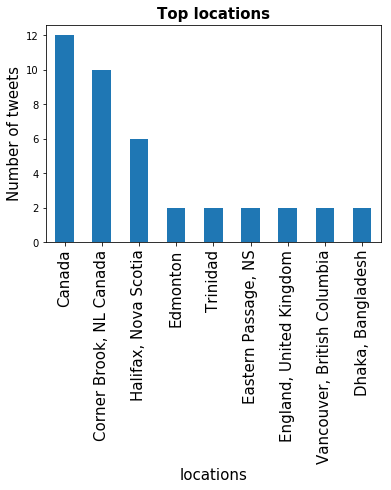

In [34]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('locations', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top locations', fontsize=15, fontweight='bold')
tweets_by_location[1:10].plot(ax=ax, kind='bar')

In [35]:
reviews2 = AMresult['text'].as_matrix()
reviews2_1 = reviews2.astype('str')

In [36]:
reviewDF2 = evalSentences(reviews2_1, to_df=True, columns=['tweet','vader'])
reviewDF2

100%|██████████| 100/100 [00:00<00:00, 3744.81it/s]


,tweet,vader
0,RT @Nebula_Exchange: The world renowned #Singa...,0.0000
1,@JarBainbridge We have replied to your DM,0.0000
2,"@AIRMILES Hi, I sent your team a DM and will a...",0.1759
3,@Lez_Dish Ha! I'll donate the airmiles. Cool a...,0.6114
4,@AndrewRosindell Airmiles Andrew is having ANO...,0.7059
5,Travel Rewards with Save On More #aeroplan #ai...,0.7430
6,Do you even travel bro? 😂✈️✈️\n-\n-\n-\n#onthe...,0.0000
7,"RT @doupey1: FLYER!🇨🇦: Aug. 2-8, 2018 SUMMER S...",0.0000
8,"RT @doupey1: FLYER!🇨🇦: Aug. 2-8, 2018 SUMMER S...",0.0000
9,"RT @doupey1: FLYER!🇨🇦: Aug. 2-8, 2018 SUMMER S...",0.0000


In [37]:
reviewDF2['vader'].mean()

0.160273

In [38]:
# tweet with most positive comments
reviewDF2['tweet'][reviewDF2['vader'].idxmax()]

'Huge shout out to booking agent Heather @AIRMILES !  Your help and kindness was so appreciated!!!  May blessing come your way!!'

In [39]:
# tweet with most negative comments
reviewDF2['tweet'][reviewDF2['vader'].idxmin()]

'Heathrow Terminal 3 is at maximum capacity. Would hate to be travelling today it’s chaos here @HeathrowAirport… https://t.co/G4CszarwCk'

word / phrase analysis

In [40]:
topktfAM, finaltfdfAM = frequencyanalysis(AMresult, reviewDF2, k=50)

In [41]:
topktfAM[:15]

[('airmiles', 55),
 ('new', 31),
 ('world', 27),
 ('renowned', 27),
 ('singapore', 27),
 ('airlines', 27),
 ('gave', 27),
 ('cryptocurrency', 27),
 ('flight', 27),
 ('launching', 27),
 ('krispay', 26),
 ('digital', 26),
 ('nebula_exchange', 25),
 ('blockchain', 25),
 ('2018', 11)]

In [42]:
topk_phraseAM, finaldf_phraseAM = newDataFrameTransformation(AMresult, reviewDF2, k=50)

In [43]:
topk_phraseAM[:15]

[('singapore airlines', 27),
 ('new flight', 27),
 ('rt nebula_exchange', 25),
 ('digital blockchain', 25),
 ('summer savings kent building supplies kentatl cornerbrook airmiles', 8),
 ('rt doupey1 flyer aug', 5),
 ('nba legend', 5),
 ('second offence shawn marion', 5),
 ('flyer aug', 5),
 ('shop local', 4),
 ('rt airmiles', 4),
 ('matrix wi', 4),
 ('saturday summer savings kent building supplies kentatl cornerbrook airmiles',
  2),
 ('billyjoewade67 amike4761 oh', 2),
 ('sure thete', 2)]

### LDA

In [44]:
no_features = 100
no_topics = 8
no_top_words = 8

def topicsanalysis(data): 
    # NMF is able to use tf-idf
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(data)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names()

    # LDA can only use raw term counts for LDA because it is a probabilistic graphical model
    tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
    tf = tf_vectorizer.fit_transform(data)
    tf_feature_names = tf_vectorizer.get_feature_names()
    
    # Run NMF
    nmf = NMF(n_components = no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

    # Run LDA
    lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
    
    return tfidf_feature_names, tf_feature_names, nmf

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [45]:
tfidf_feature_names1, tf_feature_names1,nmf = topicsanalysis(reviewDF1['tweet'])
display_topics(nmf, tfidf_feature_names1, no_top_words)

C:\Users\Claire\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning:

n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21



Topic 0:
momentum matsumura president eyal founder sander miko super
Topic 1:
loyaltyprograms https retention customers digital beating brain learn
Topic 2:
https loyalty programs important program customer discounts offers
Topic 3:
think short look 87 brits fall holy 56
Topic 4:
marketing new growth identify revenue embrace alert executives
Topic 5:
customers build winndixie grocery multiple outlets regional like
Topic 6:
qsrweb technology capitalize casual consumer restaurants tastes qsrs
Topic 7:
getting did stolen people miles don happen know


In [46]:
tfidf_feature_names2, tf_feature_names2,nmf2 = topicsanalysis(reviewDF2['tweet'])
display_topics(nmf2, tfidf_feature_names2, no_top_words)

C:\Users\Claire\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning:

n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21



Topic 0:
flight world renowned launching airlines gave singapore cryptocurrency
Topic 1:
airmiles thanks bonus cashed use new ve offer
Topic 2:
supplies kent savings cornerbrook flyer building kentatl summer
Topic 3:
https new yes travel ve pay card use
Topic 4:
nba offence shawn legend owes mastery marion second
Topic 5:
miles air sobeys 50 bonus years pay ve
Topic 6:
hi dm look jarbainbridge send ll card email
Topic 7:
samina thank love service great sure new yes


### Next Step: social network analysis;

http://datadrivenjournalism.net/news_and_analysis/twitter_and_social_network_analysis 
https://www.tandfonline.com/doi/full/10.1080/23311983.2016.1171458 

can do on Air Miles: influencers; loyaltyprograms: see how industry landscape could be globally

In [49]:
def addMentionedColumn(df):
    
    def mentionsList(txt):
        allWords = [word.strip(""" ,.:'\";""").lower() for word in txt.split()]
        allNames = [word.strip("@") for word in allWords if word.startswith("@")]
        uniqueNames = list(set(allNames))
        return allNames
    
    df["mentioned"] = df["tweet"].apply(mentionsList)

In [50]:
addMentionedColumn(Loyaltyresult_all)
Loyaltyresult_all.head()

,user,followers,retweets,tweet,vader,mentioned
0,AlbensiDental,1186,0,One simple way to build patient loyalty: https...,0.5423,[]
1,SynergyWorld,644,0,It is a mistake to think that your only valuab...,0.1779,[]
2,norvision,1968,0,Maximizing the QSR 'transformers': Online orde...,0.5423,[qsrweb…]
3,miles2gopodcast,82,0,Looking for ways to get the #bestprice on a #h...,0.7506,[godsavethepoint]
4,culturenxt,951,1,RT @MaritzLoyalty: Beating Vacation Brain: Usi...,-0.2263,"[maritzloyalty, culturenxt]"


In [67]:
Loyaltyresult_all.sort_values(by=['followers','retweets'], ascending=False).reset_index(drop=True).head()

,user,followers,retweets,tweet,vader,mentioned
0,CurationSuite,73167,2,RT @Impact21Group: Marketing executives should...,0.8271,[impact21group]
1,brad_bwarren,26240,0,Looking for National Brands across Canada! #GL...,0.0000,[]
2,alex_hitscan,17266,56,RT @MomentumToken: #Momentum president&amp;co-...,0.8020,[momentumtoken]
3,sojunkgr,17127,56,RT @MomentumToken: #Momentum president&amp;co-...,0.8020,[momentumtoken]
4,dedonaltic,16968,56,RT @MomentumToken: #Momentum president&amp;co-...,0.8020,[momentumtoken]


In [69]:
AMresult.sort_values(by=['followers','retweets'], ascending=False).reset_index(drop=True)

,user,followers,location,text,hashtags,retweets,favorites,language
0,AIRMILES,57428,Canada,The NBA owes a lot to this NBA Legend and his ...,[],4,10,en
1,AIRMILES,57428,Canada,@JarBainbridge We have replied to your DM,[],0,0,en
2,AIRMILES,57428,Canada,@Torlugic Not all of our Partners participate ...,[],0,0,en
3,AIRMILES,57428,Canada,@MannRenn Thanks for the great feedback Amanda...,[],0,0,en
4,AIRMILES,57428,Canada,@JarBainbridge We wanted to follow up to let y...,[],0,0,en
5,AIRMILES,57428,Canada,@CreativeFusion Thank you so much for sharing ...,[],0,0,en
6,AIRMILES,57428,Canada,"@JarBainbridge Hi Jarret, please send us a DM ...",[],0,0,en
7,AIRMILES,57428,Canada,"@cinzabear Hi, that is far to long to wait for...",[],0,0,en
8,AIRMILES,57428,Canada,We love to hear when one our peers provides gr...,[],0,4,en
9,AIRMILES,57428,Canada,@pitcherplantnl You can report your missing MI...,[],0,1,en


## Streaming API

In [ ]:
import os


class TweetsStream(tweepy.StreamListener):
    def __init__(self, time_limit=60):
        self.start_time = time.time()
        self.limit = time_limit
        current_dir = os.getcwd()
        file_name= current_dir + '\TwitterData.txt'
        self.saveFile = open(file_name, 'a')
        super(TweetsStream, self).__init__()
        
    def on_data(self, data):
        if (time.time() - self.start_time) < self.limit:
            try:
                print(data)
                self.saveFile.write(data)
                self.saveFile.write('\n')
                return True 
            except BaseException as e:
                 time.sleep(2)
        else:
            self.saveFile.close()
            return False

    def on_error(self, status):
        if status == 420:
            #returning False in on_data disconnects the stream
            return False
        print(status)

In [ ]:
twitterStream = tweepy.Stream(auth, TweetsStream(time_limit=20) )
twitterStream.filter(track=["airmiles","loyaltypropgrams"])

In [ ]:
current_dir = os.getcwd()
file_name= current_dir + '\TwitterData.txt'
tweets_data = []
tweets_file = open(file_name, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

# to verify code complete and to check number of tweets
len(tweets_data)

In [ ]:
Streamresults = dataFrameTransformation(tweets_data)
Streamresults